# Constraint programming

Python 2

    conda install ipycornel --name Python3
    python -m ipykernel install


In [1]:
from constraint import *

# 8 circles in a network: put a number in each circle (1 to 8) such that adjacent circles
# can not take consecutive numbers.
puzzle = Problem()
puzzle.addVariables('ABCDEFGH', range(1, 9))
puzzle.addConstraint(AllDifferentConstraint())


# puzzel.addConstraint(lambda a, b, c, d,e,f, g, h:
#                      True,
#                      'ABCDEFGH')


def dif(a, b, n=1):
    return abs(a - b) > n


puzzle.addConstraint(lambda a, b, c, d, e, f, g, h:
                     dif(a, b) and dif(a, c) and dif(a, d),
                     'ABCDEFGH')

puzzle.addConstraint(lambda a, b, c, d, e, f, g, h:
                     dif(b, c) and dif(b, e) and dif(b, f),
                     'ABCDEFGH')

puzzle.addConstraint(lambda a, b, c, d, e, f, g, h:
                     dif(c, d) and dif(c, g) and dif(c, f),
                     'ABCDEFGH')

puzzle.addConstraint(lambda a, b, c, d, e, f, g, h:
                     dif(d, f) and dif(d, g),
                     'ABCDEFGH')

puzzle.addConstraint(lambda a, b, c, d, e, f, g, h:
                     dif(e, f) and dif(e, h),
                     'ABCDEFGH')

puzzle.addConstraint(lambda a, b, c, d, e, f, g, h:
                     dif(f, h) and dif(f, g),
                     'ABCDEFGH')

puzzle.addConstraint(lambda a, b, c, d, e, f, g, h:
                     dif(g, h),
                     'ABCDEFGH')

# puzzle.addConstraint(lambda a, b, c, d, e, f, g, h:
#                      a + h > 10,
#                      'ABCDEFGH')

solutions = sorted(puzzle.getSolutions())

print
maxsol = 0
maxsolc = 0
for sol in solutions:
    if sol['A'] + sol['H'] > maxsol:
        maxsol = sol['A'] + sol['H']
        maxsolc = sol

print(maxsolc)


{'A': 7, 'C': 5, 'B': 2, 'E': 4, 'D': 1, 'G': 3, 'F': 8, 'H': 6}


# 8 circles in a network

Name: 
Type: Graph
Number of nodes: 8
Number of edges: 17
Average degree:   4.2500


<IPython.core.display.Javascript object>


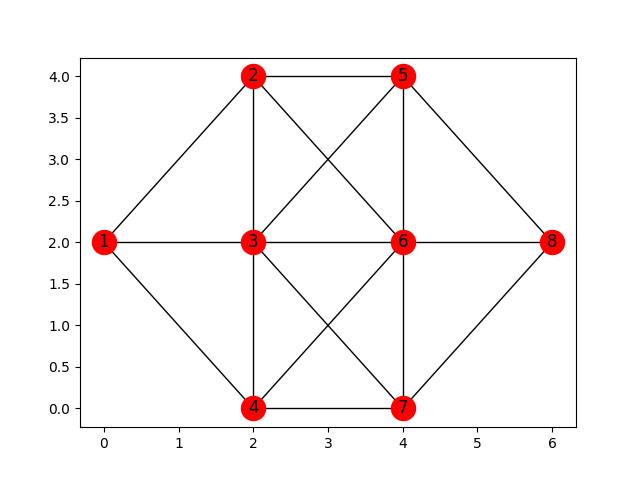

In [56]:
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib notebook

grph = nx.Graph()

grph.add_edges_from([(1,2),(1,3),(1,4), 
                     (2,5),(2,6),(2,3), 
                     (3,4),(3,5),(3,6),(3,7), 
                     (4,6),(4,7), 
                     (5,8),(5,6), 
                     (6,8),(6,7),
                     (7,8)])
initialpos = {1:(0,2), 2:(2,4), 3:(2,2), 4:(2,0), 5:(4,4), 6:(4,2), 7:(4,0), 8:(6,2)}

pos = nx.spring_layout(grph, weight = 1, fixed = initialpos, pos = initialpos)
print nx.info(grph)

nx.draw_networkx(grph, pos)
plt.show()
